In [1]:
# import libraries
import csv
import numpy as np
import pandas as pd    

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(color_codes=True)

In [3]:
# import train_test_split function
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn import metrics

First we will build a few models for ZIP codes, since they cover larger areas and then move on to Parking areas to see which models perform better.

## 1 ZIP CODES

In [6]:
data_2018_ZIP = pd.read_csv('Data_2018_groupedby_zip_and_sum.csv')

In [7]:
data_2019_ZIP = pd.read_csv('Data_2019_groupedby_ZIP_and_sum.csv')

In [8]:
import copy
data_2018_ZIP_copy = data_2018_ZIP.copy()
data_2019_ZIP_copy = data_2019_ZIP.copy()

In [8]:
# check the first few rows
data_2018_ZIP_copy.head()

,ZIP,OccupancyDateTime,Weekday,Date,DayInMonth,HourIn24HourClock,MinutesInHour,PaidOccupancy,AdjustedParkingAvailability
0,98101,03/21/2018 01:00:00 PM,Wednesday,03/21/2018,21,13,0,523,783
1,98101,03/21/2018 01:01:00 PM,Wednesday,03/21/2018,21,13,1,526,781
2,98101,03/21/2018 01:02:00 PM,Wednesday,03/21/2018,21,13,2,522,784
3,98101,03/21/2018 01:03:00 PM,Wednesday,03/21/2018,21,13,3,517,792
4,98101,03/21/2018 01:04:00 PM,Wednesday,03/21/2018,21,13,4,520,790


In [196]:
# compute summary statistics
data_2018_ZIP_copy.describe()

,ZIP,DayInMonth,HourIn24HourClock,MinutesInHour,PaidOccupancy,AdjustedParkingAvailability
count,298080.000000,298080.000000,298080.000000,298080.000000,298080.000000,298080.000000
mean,98118.032609,16.555556,13.673913,29.500000,299.565872,364.844438
std,18.221167,8.820586,3.599851,17.318131,340.033915,429.067056
min,98101.000000,2.000000,8.000000,0.000000,0.000000,0.000000
25%,98104.000000,9.000000,11.000000,14.750000,35.000000,33.000000
50%,98115.000000,17.000000,14.000000,29.500000,128.000000,106.000000
75%,98122.000000,24.000000,17.000000,44.250000,472.000000,682.000000
max,98164.000000,31.000000,21.000000,59.000000,1525.000000,2017.000000


In [9]:
# create a dataframe with selected columns
data_2018_ZIP_copy_less = data_2018_ZIP_copy[['ZIP', 'Weekday', 'HourIn24HourClock', 'AdjustedParkingAvailability', 'PaidOccupancy']]
data_2019_ZIP_copy_less = data_2019_ZIP_copy[['ZIP', 'Weekday', 'HourIn24HourClock', 'AdjustedParkingAvailability', 'PaidOccupancy']]

In [9]:
# get more information about the dataframe
data_2018_ZIP_copy_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298080 entries, 0 to 298079
Data columns (total 5 columns):
ZIP                            298080 non-null int64
Weekday                        298080 non-null object
HourIn24HourClock              298080 non-null int64
AdjustedParkingAvailability    298080 non-null int64
PaidOccupancy                  298080 non-null int64
dtypes: int64(4), object(1)
memory usage: 11.4+ MB


In [10]:
# convert 'ZIP' column to string type
data_2018_ZIP_copy_less['ZIP'] = data_2018_ZIP_copy_less['ZIP'].apply(str)
data_2019_ZIP_copy_less['ZIP'] = data_2019_ZIP_copy_less['ZIP'].apply(str)

/anaconda3/envs/statenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/statenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data_2018_ZIP_copy_less.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298080 entries, 0 to 298079
Data columns (total 5 columns):
ZIP                            298080 non-null object
Weekday                        298080 non-null object
HourIn24HourClock              298080 non-null int64
AdjustedParkingAvailability    298080 non-null int64
PaidOccupancy                  298080 non-null int64
dtypes: int64(3), object(2)
memory usage: 11.4+ MB


In [11]:
# One-hot encode categorical features
data_ZIP_features2 = pd.get_dummies(data_2018_ZIP_copy_less)
data_2019_ZIP_features2 = pd.get_dummies(data_2019_ZIP_copy_less)

In [13]:
# check how dataframe looks like after change
data_ZIP_features2.head()

,HourIn24HourClock,AdjustedParkingAvailability,PaidOccupancy,ZIP_98101,ZIP_98102,ZIP_98103,ZIP_98104,ZIP_98105,ZIP_98107,ZIP_98109,...,ZIP_98122,ZIP_98134,ZIP_98154,ZIP_98164,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,13,783,523,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13,781,526,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13,784,522,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,13,792,517,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13,790,520,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# check column names
data_ZIP_features2.columns

Index(['HourIn24HourClock', 'AdjustedParkingAvailability', 'PaidOccupancy',
       'ZIP_98101', 'ZIP_98102', 'ZIP_98103', 'ZIP_98104', 'ZIP_98105',
       'ZIP_98107', 'ZIP_98109', 'ZIP_98115', 'ZIP_98118', 'ZIP_98119',
       'ZIP_98121', 'ZIP_98122', 'ZIP_98134', 'ZIP_98154', 'ZIP_98164',
       'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

In [15]:
print('Shape of features after one-hot encoding:', data_ZIP_features2.shape)

Shape of features after one-hot encoding: (298080, 24)


### 1.1 MODEL WITH PARKING OCCUPANCY

In [75]:
# labels are the values we want to predict
labels_ZIP = np.array(data_ZIP_features2['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_ZIP = data_ZIP_features2.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_ZIP = list(features_ZIP.columns) 

# convert to numpy array
features_ZIP = np.array(features_ZIP)

We can use the train_test_split function to make the split. The test_size=0.3 inside the function indicates the percentage of the data that should be retained for testing (train/test: 70/30).

In [76]:
# split dataset into training set and test set, 70% training and 30% test
X_train_ZIP, X_test_ZIP, y_train_ZIP, y_test_ZIP = train_test_split(features_ZIP, labels_ZIP, test_size=0.3)

In [14]:
print('Training Features Shape:', X_train_ZIP.shape)
print('Training Labels Shape:', y_train_ZIP.shape)
print('Testing Features Shape:', X_test_ZIP.shape)
print('Testing Labels Shape:', y_test_ZIP.shape)

Training Features Shape: (208656, 23)
Training Labels Shape: (208656,)
Testing Features Shape: (89424, 23)
Testing Labels Shape: (89424,)


In [77]:
# instantiate model 
rand_forest_ZIP = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_ZIP.fit(X_train_ZIP, y_train_ZIP)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
# use the forest's predict method on the test data
rf_ZIP_pred = rand_forest_ZIP.predict(X_test_ZIP)

In [17]:
# printing the first 6 values of y_test_ZIP and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_ZIP)[i], rf_ZIP_pred[i]))

Actual parking availability: 450 and Predicted parking availability: 450.4428333333334
Actual parking availability: 1344 and Predicted parking availability: 1331.5925
Actual parking availability: 233 and Predicted parking availability: 226.31472619047622
Actual parking availability: 1103 and Predicted parking availability: 1108.7877940115443
Actual parking availability: 201 and Predicted parking availability: 206.8902380952381
Actual parking availability: 11 and Predicted parking availability: 11.0


Seems like the trained classifier didn't do a good job at predicting the first 6 target classes. It was correct only on two occasions, while the other ones were close. 

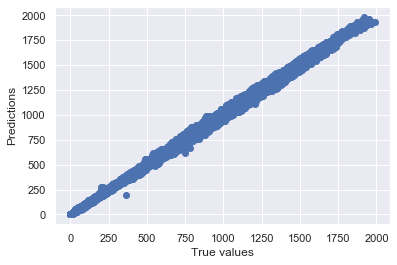

In [18]:
# plot the model
plt.scatter(y_test_ZIP, rf_ZIP_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

From the plot we can see that predictions are very close to the true value of parking availability. Based on the spread, prediction errors aren't that large. What we can see that from printed values above.

#### 1.1.1 Finding Important Features

The importances returned in Skicit-learn represent how much including a particular variable improves the prediction.

In [79]:
# the feature importances (the higher, the more important the feature)
print(rand_forest_ZIP.feature_importances_)

[7.08001966e-02 6.15819307e-01 7.80846478e-03 6.62081607e-04
 1.80091375e-04 4.39739440e-02 7.13182077e-02 1.02929630e-01
 4.67333753e-02 8.13571377e-03 1.68157534e-05 4.37183180e-04
 7.40762472e-03 2.28186035e-02 2.99652453e-05 1.21440858e-04
 1.52336382e-04 6.43303284e-05 1.50462410e-04 3.46971210e-04
 2.75843968e-05 4.01671450e-05 2.55028628e-05]


In [80]:
# create pandas Series from feature importances
ZIP_feature_imp = pd.Series(rand_forest_ZIP.feature_importances_, index=feature_list_ZIP).sort_values(ascending=False)
ZIP_feature_imp

PaidOccupancy        0.615819
ZIP_98107            0.102930
ZIP_98105            0.071318
HourIn24HourClock    0.070800
ZIP_98109            0.046733
ZIP_98104            0.043974
ZIP_98122            0.022819
ZIP_98115            0.008136
ZIP_98101            0.007808
ZIP_98121            0.007408
ZIP_98102            0.000662
ZIP_98119            0.000437
Weekday_Saturday     0.000347
ZIP_98103            0.000180
ZIP_98164            0.000152
Weekday_Monday       0.000150
ZIP_98154            0.000121
Weekday_Friday       0.000064
Weekday_Tuesday      0.000040
ZIP_98134            0.000030
Weekday_Thursday     0.000028
Weekday_Wednesday    0.000026
ZIP_98118            0.000017
dtype: float64

Below we visualized  the feature importance, since it is easier to understand and interpret that way.

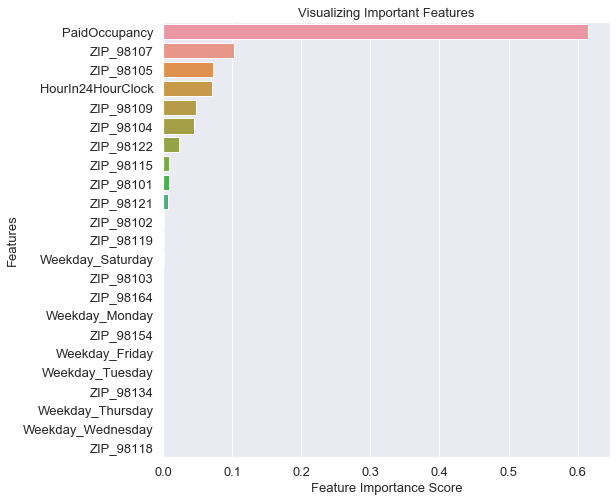

In [81]:
# creating a bar plot
plt.figure(figsize=(8,8))
sns.barplot(x=ZIP_feature_imp, y=ZIP_feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=13)
plt.ylabel('Features', fontsize=13)
plt.title('Visualizing Important Features', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

As expected, the most important feature is Paid occupancy. This makes sense, because it has the biggest correlation with parking availability, they depend on each other (when one goes up the other goes down). Generally we could eliminate few least important features, but in this case it is not a good idea, since we are interested in Parking availability for each zip code.

The first two important Zip codes are not in the city center (98105 is where University district is and 98107 is where Ballard area is), but in the northern part from the center.
Zip codes 98104, 98101, 98121 are in the city center and Zip codes 98109 and 198122 are very close to the city center (next to it).
Zip code 98118 is south from the center and 98134 is an industrial district. Zip codes 98154 and 98164 are the smallest zip codes (approximately the size of one block) and we can assume that is the reason they are less important, even though they are in the city center. For all other zip codes we cannot make assumptions that the size plays a factor in how important a zip code is.

It also makes sense that hour of the day is a more important feature than the day of the week, since the parking availability is changing more through a day than between days. What is interesting to see is that Saturday is the most important day of the week, but if we look at the zip code linear regression model it has the lowest coefficient and Monday has the highest coefficient. 

#### 1.1.2 Model's performance



For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. First, lets check their meaning.

The max_error function computes the maximum residual error, a metric that captures the worst case error between the predicted value and the true value. 

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss.

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

R_squared:
It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
R_squared is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Basically, how accurate is our model)

The explained_variance_score computes the explained variance regression score.

In [24]:
print('Max Error:', metrics.max_error(y_test_ZIP, rf_ZIP_pred))

Max Error: 165.8925833333333


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ZIP, rf_ZIP_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ZIP, rf_ZIP_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ZIP, rf_ZIP_pred)))

Mean Absolute Error: 4.450760767006454
Mean Squared Error: 90.88265672914336
Root Mean Squared Error: 9.533239571580237


Our average estimate is off by 4.45 parking spots.

In [26]:
print('R_squared:', metrics.r2_score(y_test_ZIP, rf_ZIP_pred)) 
print('Explained variance:', metrics.explained_variance_score(y_test_ZIP, rf_ZIP_pred)) 

R_squared: 0.9995063979356883
Explained variance: 0.999506398619813


In [90]:
# average parking availability
y_labels.mean()

364.8444377348363

With 100 trees, the root mean squared error is 9.53 which is lower than 10 percent of the average parking availability (364.84). This may indicate that we have used enough estimators (trees).

#### 1.1.3 Predict on data from 2019

In [16]:
# labels are the values we want to predict
labels_ZIP_2019 = np.array(data_2019_ZIP_features2['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_ZIP_2019 = data_2019_ZIP_features2.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_ZIP_2019 = list(features_ZIP_2019.columns) 

# convert to numpy array
features_ZIP_2019 = np.array(features_ZIP_2019)

In [17]:
# use the forest's predict method on the test data 2019
rf_ZIP_pred_2019 = rand_forest_ZIP.predict(features_ZIP_2019)

In [18]:
# printing the first 6 values of labels_ZIP_2019 and the predicted results
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(labels_ZIP_2019)[i], rf_ZIP_pred_2019[i]))

Actual parking availability: 700 and Predicted parking availability: 787.0758333333333
Actual parking availability: 701 and Predicted parking availability: 791.6291666666666
Actual parking availability: 704 and Predicted parking availability: 793.6941666666665
Actual parking availability: 708 and Predicted parking availability: 793.6925
Actual parking availability: 707 and Predicted parking availability: 793.6925
Actual parking availability: 709 and Predicted parking availability: 793.96125


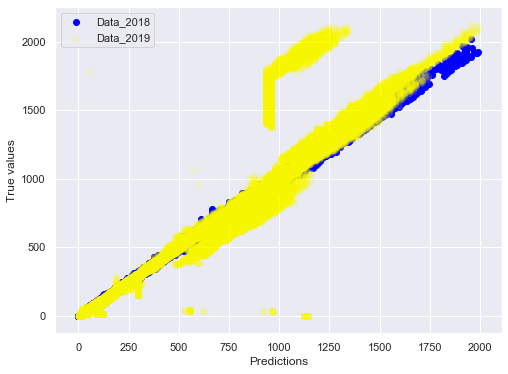

In [49]:
# comparing predictions
plt.figure(figsize=(8,6))
plt.scatter(rf_ZIP_pred, y_test_ZIP, c = 'Blue', label = 'Data_2018')
plt.scatter(rf_ZIP_pred_2019, labels_ZIP_2019,  c = 'Yellow', label = 'Data_2019', alpha = 0.1)
plt.ylabel('True values')
plt.xlabel('Predictions')
plt.legend()
plt.show()

By looking at the plot and printed values above we can see that the model has larger prediction errors when making predictions on the data from 2019, compared to data from 2018.

In [20]:
print('Max Error:', metrics.max_error(labels_ZIP_2019, rf_ZIP_pred_2019))
print('Mean Absolute Error:', metrics.mean_absolute_error(labels_ZIP_2019, rf_ZIP_pred_2019))
print('Explained variance:', metrics.explained_variance_score(labels_ZIP_2019, rf_ZIP_pred_2019)) 
print('R_squared:', metrics.r2_score(labels_ZIP_2019, rf_ZIP_pred_2019)) 
print('Mean Squared Error:', metrics.mean_squared_error(labels_ZIP_2019, rf_ZIP_pred_2019))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(labels_ZIP_2019, rf_ZIP_pred_2019)))

Max Error: 1728.7
Mean Absolute Error: 44.02112583610652
Explained variance: 0.9274930443713537
R_squared: 0.9263416941708572
Mean Squared Error: 17138.396795465484
Root Mean Squared Error: 130.91369980053838


These printed regression metrics just confirm that the model doesn't perform well on a new, unseen set of data points (in this case, the data from 2019).

### 1.2 MODEL WITHOUT PAID OCCUPANCY

Let's check what happens if we eliminate the 'PaidParkingOccupancy' feature.

In [27]:
# use numpy to convert to arrays

# labels are the values we want to predict
test_labels = np.array(data_ZIP_features2['AdjustedParkingAvailability'] )

# remove the labels from the features
# axis 1 refers to the columns
test_features= data_ZIP_features2.drop(['AdjustedParkingAvailability', 'PaidOccupancy'], axis = 1)

# saving feature names for later use
feature_list = list(test_features.columns)

# convert to numpy array
test_features = np.array(test_features)

In [28]:
# split the data into training and testing sets
train_feat, test_feat, train_lab, test_lab = train_test_split(test_features, test_labels, test_size = 0.3)

In [29]:
print('Training Features Shape:', train_feat.shape)
print('Training Labels Shape:', train_lab.shape)
print('Testing Features Shape:', test_feat.shape)
print('Testing Labels Shape:', test_lab.shape)

Training Features Shape: (208656, 22)
Training Labels Shape: (208656,)
Testing Features Shape: (89424, 22)
Testing Labels Shape: (89424,)


In [31]:
# instantiate model 
rand_forest_ZIP2 = RandomForestRegressor(n_estimators= 100)

# train the model on training data
rand_forest_ZIP2.fit(train_feat, train_lab)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
# use the forest's predict method on the test data
rf_pred_ZIP2 = rand_forest_ZIP2.predict(test_feat)

In [33]:
# printing the first 6 values of test_lab and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(test_lab)[i], rf_pred_ZIP2[i]))

Actual parking availability: 466 and Predicted parking availability: 421.85565395705794
Actual parking availability: 1085 and Predicted parking availability: 1130.5947249332185
Actual parking availability: 463 and Predicted parking availability: 460.91318781170986
Actual parking availability: 6 and Predicted parking availability: 6.059949585236431
Actual parking availability: 1307 and Predicted parking availability: 1335.2326356190595
Actual parking availability: 88 and Predicted parking availability: 75.28727308295149


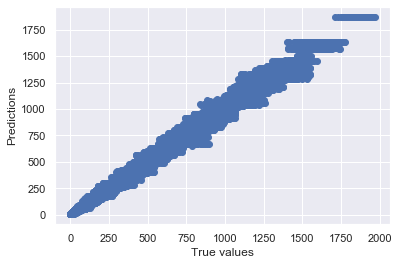

In [34]:
# plot the model
plt.scatter(test_lab, rf_pred_ZIP2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

If we compare above printed values with this graph it is clear there are some prediction errors. They are slightly greater than in the previous model, when we included parking occupancy. That was expected, since paid parking occupancy is the most important feature of predictions.

#### 1.2.1 Finding important features

In [35]:
# the feature importances (the higher, the more important the feature)
print(rand_forest_ZIP2.feature_importances_)

[1.40968991e-01 9.20782704e-02 8.88826118e-04 9.31571201e-06
 2.30731854e-01 3.83966069e-02 1.12314437e-02 2.32617348e-01
 8.23466175e-04 5.03753187e-06 8.76227698e-04 1.58790166e-01
 8.67932771e-02 2.45364002e-05 1.25585528e-04 1.59484547e-04
 3.61911114e-04 1.12411270e-03 3.55414401e-03 1.15351689e-04
 1.97446547e-04 1.26597334e-04]


In [37]:
# create a pandas Series of feature importance in descending order
ZIP_feature_imp2 = pd.Series(rand_forest_ZIP2.feature_importances_, index=feature_list).sort_values(ascending=False)
ZIP_feature_imp2

ZIP_98109            0.232617
ZIP_98104            0.230732
ZIP_98121            0.158790
HourIn24HourClock    0.140969
ZIP_98101            0.092078
ZIP_98122            0.086793
ZIP_98105            0.038397
ZIP_98107            0.011231
Weekday_Saturday     0.003554
Weekday_Monday       0.001124
ZIP_98102            0.000889
ZIP_98119            0.000876
ZIP_98115            0.000823
Weekday_Friday       0.000362
Weekday_Tuesday      0.000197
ZIP_98164            0.000159
Weekday_Wednesday    0.000127
ZIP_98154            0.000126
Weekday_Thursday     0.000115
ZIP_98134            0.000025
ZIP_98103            0.000009
ZIP_98118            0.000005
dtype: float64

Zip codes that are in the city center are more important for making predictions than the rest. Zip code 98134 represent an industrial district.

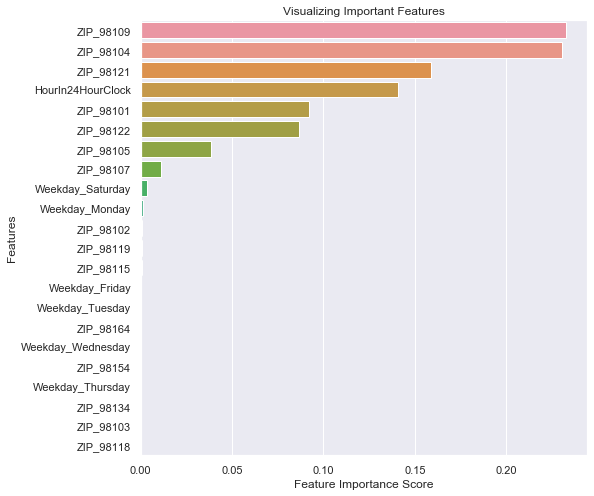

In [39]:
# creating a bar plot of features
plt.figure(figsize=(8,8))
sns.barplot(x=ZIP_feature_imp2, y=ZIP_feature_imp2.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

Once we remove PaidParkingOccupancy as a feature, the most important is ZIP code 98109. Which is unexpected and different from the previous feature importance plot with paid occupancy. In this model as far as feature importance goes the top three are zip codes, but zip code 98107 - which was the most important in the previous model - fell down a few places.

#### 1.2.2 Model's performance

In [41]:
print('Max Error:', metrics.max_error(test_lab, rf_pred_ZIP2), 'parking spots.')

Max Error: 249.76161455880697 parking spots.


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_lab, rf_pred_ZIP2))
print('Mean Squared Error:', metrics.mean_squared_error(test_lab, rf_pred_ZIP2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_lab, rf_pred_ZIP2)))

Mean Absolute Error: 17.296092953921082
Mean Squared Error: 845.5602128548451
Root Mean Squared Error: 29.078518064971004


In [43]:
print('R_squared:', metrics.r2_score(test_lab, rf_pred_ZIP2)) 
print('Explained variance:', metrics.explained_variance_score(test_lab, rf_pred_ZIP2)) 

R_squared: 0.9954278941923846
Explained variance: 0.9954280260999147


In this model the maximum error is visibly greater than in the previous model (with parking occupancy) by 84 parking spots. The same is true for the mean absolute error, it is greater by 13 compared to the previous model. It also explains less variance.
Even though the root mean squared error is higher than in the previous model with parking occupancy, it is still lower than 10% of the mean value of parking availability (which is 364.84). This means that the model is accurate, but it is not making good predictions.

It would be interesting to see a model's performance for a specific zip code. We selected zip code 98101, because it is in the city center and we also used it for the linear regression model.

### 1.3 ZIP CODE 98101

In [107]:
# extract data fro zip code 98101
data_ZIP_98101 = data_2018_ZIP[data_2018_ZIP['ZIP'] == 98101]

In [110]:
# check first few rows
data_ZIP_98101.head()

,ZIP,OccupancyDateTime,Weekday,Date,DayInMonth,HourIn24HourClock,MinutesInHour,PaidOccupancy,AdjustedParkingAvailability
0,98101,03/21/2018 01:00:00 PM,Wednesday,03/21/2018,21,13,0,523,783
1,98101,03/21/2018 01:01:00 PM,Wednesday,03/21/2018,21,13,1,526,781
2,98101,03/21/2018 01:02:00 PM,Wednesday,03/21/2018,21,13,2,522,784
3,98101,03/21/2018 01:03:00 PM,Wednesday,03/21/2018,21,13,3,517,792
4,98101,03/21/2018 01:04:00 PM,Wednesday,03/21/2018,21,13,4,520,790


In [108]:
# compute summary statistics
data_ZIP_98101.describe()

,ZIP,DayInMonth,HourIn24HourClock,MinutesInHour,PaidOccupancy,AdjustedParkingAvailability
count,22680.0,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000
mean,98101.0,16.555556,14.500000,29.500000,386.845547,644.711861
std,0.0,8.820765,4.031218,17.318484,190.884836,280.239776
min,98101.0,2.000000,8.000000,0.000000,7.000000,0.000000
25%,98101.0,9.000000,11.000000,14.750000,306.000000,638.000000
50%,98101.0,17.000000,14.500000,29.500000,413.000000,709.000000
75%,98101.0,24.000000,18.000000,44.250000,535.000000,790.000000
max,98101.0,31.000000,21.000000,59.000000,730.000000,1178.000000


In [109]:
# create a copy of the dataframe
data_ZIP_98101_copy = data_ZIP_98101.copy()

In [111]:
# create a new dataframe with just selected columns
data_ZIP_98101_copy_less = data_ZIP_98101_copy[['Weekday', 'HourIn24HourClock', 'PaidOccupancy', 'AdjustedParkingAvailability']]

In [112]:
# One-hot encode categorical features
data_ZIP_98101_features = pd.get_dummies(data_ZIP_98101_copy_less)

In [113]:
# labels are the values we want to predict
labels_ZIP_98101 = np.array(data_ZIP_98101_features['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_ZIP_98101 = data_ZIP_98101_features.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_ZIP_98101 = list(features_ZIP_98101.columns) 

# convert to numpy array
features_ZIP_98101 = np.array(features_ZIP_98101)

In [114]:
# split dataset into training set and test set, 70% training and 30% test
X_train_ZIP_98101, X_test_ZIP_98101, y_train_ZIP_98101, y_test_ZIP_98101 = train_test_split(features_ZIP_98101, labels_ZIP_98101, test_size=0.3)

In [115]:
# instantiate model 
rand_forest_ZIP_98101 = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_ZIP_98101.fit(X_train_ZIP_98101, y_train_ZIP_98101)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
# use the forest's predict method on the test data
rd_pred_ZIP_98101 = rand_forest_ZIP_98101.predict(X_test_ZIP_98101)

In [121]:
# printing the first 6 values of y_test_ZIP_98101 and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_ZIP_98101)[i], rd_pred_ZIP_98101[i]))

Actual parking availability: 639 and Predicted parking availability: 646.2941666666667
Actual parking availability: 657 and Predicted parking availability: 647.542
Actual parking availability: 685 and Predicted parking availability: 685.1397222222223
Actual parking availability: 675 and Predicted parking availability: 683.1304172494174
Actual parking availability: 701 and Predicted parking availability: 699.535
Actual parking availability: 644 and Predicted parking availability: 661.0555039682539


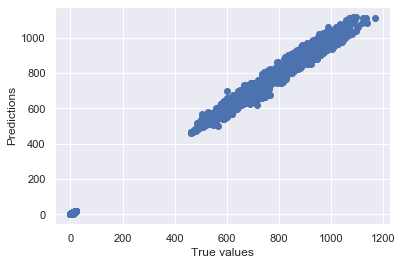

In [117]:
# plot the model
plt.scatter(y_test_ZIP_98101, rd_pred_ZIP_98101)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

Looking at printed values and above graph, we can see predicted values are close to actual values. The model made small prediction errors.

#### 1.3.1 Finding important features

In [119]:
# create pandas Series from feature importance
feature_imp_ZIP_98101 = pd.Series(rand_forest_ZIP_98101.feature_importances_, index=feature_list_ZIP_98101).sort_values(ascending=False)
feature_imp_ZIP_98101

HourIn24HourClock    0.558059
PaidOccupancy        0.438063
Weekday_Saturday     0.001909
Weekday_Friday       0.001178
Weekday_Monday       0.000246
Weekday_Thursday     0.000235
Weekday_Wednesday    0.000175
Weekday_Tuesday      0.000134
dtype: float64

This order is unexpected, since parking occupancy is not on the first place. Which means that in zip code 98101 the most important feature to predict parking availability is hour of the day and Tuesday is the least important.

#### 1.3.2 Model's performance

In [120]:
print('Max Error:', metrics.max_error(y_test_ZIP_98101, rd_pred_ZIP_98101))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ZIP_98101, rd_pred_ZIP_98101))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ZIP_98101, rd_pred_ZIP_98101))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ZIP_98101, rd_pred_ZIP_98101)))
print('R_squared:', metrics.r2_score(y_test_ZIP_98101, rd_pred_ZIP_98101)) 
print('Explained variance:', metrics.explained_variance_score(y_test_ZIP_98101, rd_pred_ZIP_98101)) 

Max Error: 101.97933333333333
Mean Absolute Error: 10.868507008626482
Mean Squared Error: 302.0094720405764
Root Mean Squared Error: 17.378419722189253
R_squared: 0.9960937568660548
Explained variance: 0.9960937569718568


In this model the average estimate is off by 10.87 parking spots. Comparing to printed values above, we expected a slightly lower value.

## 2 PARKING AREA

In [26]:
data_2018_PARK = pd.read_csv('Data_2018_groupedby_ParkingArea_and_sum.csv')

In [27]:
data_2019_PARK = pd.read_csv('Data_2019_groupedby_ParkingArea_and_sum.csv')

In [36]:
# check the first few rows
data_2018_PARK.head()

,PaidParkingArea,OccupancyDateTime,Weekday,Date,DayInMonth,HourIn24HourClock,MinutesInHour,ZIP,PaidOccupancy,AdjustedParkingAvailability
0,12th Avenue,03/21/2018 01:00:00 PM,Wednesday,03/21/2018,21,13,0,98122,52,24
1,12th Avenue,03/21/2018 01:01:00 PM,Wednesday,03/21/2018,21,13,1,98122,50,26
2,12th Avenue,03/21/2018 01:02:00 PM,Wednesday,03/21/2018,21,13,2,98122,51,25
3,12th Avenue,03/21/2018 01:03:00 PM,Wednesday,03/21/2018,21,13,3,98122,53,23
4,12th Avenue,03/21/2018 01:04:00 PM,Wednesday,03/21/2018,21,13,4,98122,53,23


In [197]:
# compute summary statistics
data_2018_PARK.describe()

,DayInMonth,HourIn24HourClock,MinutesInHour,ZIP,PaidOccupancy,AdjustedParkingAvailability
count,633422.000000,633422.000000,633422.000000,633422.000000,633422.000000,633422.000000
mean,16.539321,13.493336,29.499907,98113.831660,140.971730,171.690958
std,8.818215,3.503922,17.318168,14.481638,196.870803,220.505879
min,2.000000,8.000000,0.000000,98101.000000,0.000000,0.000000
25%,9.000000,10.000000,14.000000,98104.000000,18.000000,34.000000
50%,17.000000,13.000000,29.000000,98109.000000,69.000000,74.000000
75%,24.000000,16.000000,44.000000,98122.000000,180.000000,230.000000
max,31.000000,21.000000,59.000000,98164.000000,1304.000000,1542.000000


Firstly we will build a model only for Parking areas, excluding zip codes they belong to.

### 2.1 PARKING AREAS WITHOUT ZIP CODES

In [50]:
# copy of data
data_2018_PARK_Z_copy= data_2018_PARK.copy()
data_2019_PARK_Z_copy= data_2019_PARK.copy()

In [51]:
# remove 'Westlake Ave N' from 2019, since it is not in 2018
data_2019_PARK_Z_copy = data_2019_PARK_Z_copy[data_2019_PARK_Z_copy['PaidParkingArea']!= 'Westlake Ave N']

In [52]:
# create new dataframes with just selected columns
data_2018_PARK_Z = data_2018_PARK_Z_copy[['PaidParkingArea', 'Weekday', 'HourIn24HourClock', 'PaidOccupancy', 'AdjustedParkingAvailability']]
data_2019_PARK_Z = data_2019_PARK_Z_copy[['PaidParkingArea', 'Weekday', 'HourIn24HourClock', 'PaidOccupancy', 'AdjustedParkingAvailability']]

In [53]:
# One-hot encode categorical features
data_PARK_Z_features = pd.get_dummies(data_2018_PARK_Z)
data_PARK_Z_features_2019 = pd.get_dummies(data_2019_PARK_Z)

In [54]:
# labels are the values we want to predict
labels_PARK_Z = np.array(data_PARK_Z_features['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK_Z = data_PARK_Z_features.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_PARK_Z = list(features_PARK_Z.columns) 

# convert to numpy array
features_PARK_Z = np.array(features_PARK_Z)

In [55]:
# split dataset into training set and test set, 70% training and 30% test
X_train_P_Z, X_test_P_Z, y_train_P_Z, y_test_P_Z = train_test_split(features_PARK_Z, labels_PARK_Z, test_size=0.3)

In [56]:
# instantiate model 
rand_forest_PARK_Z = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_PARK_Z.fit(X_train_P_Z, y_train_P_Z)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
# use the forest's predict method on the test data
rd_pred_P_Z_2018 = rand_forest_PARK_Z.predict(X_test_P_Z)

In [67]:
# printing the first 6 values of y_test_P_Z and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_P_Z)[i], rd_pred_P_Z_2018[i]))

Actual parking availability: 32 and Predicted parking availability: 32.325584564860435
Actual parking availability: 32 and Predicted parking availability: 32.0
Actual parking availability: 2 and Predicted parking availability: 2.0
Actual parking availability: 110 and Predicted parking availability: 111.54657539682543
Actual parking availability: 267 and Predicted parking availability: 267.20833333333337
Actual parking availability: 136 and Predicted parking availability: 139.98053174603174


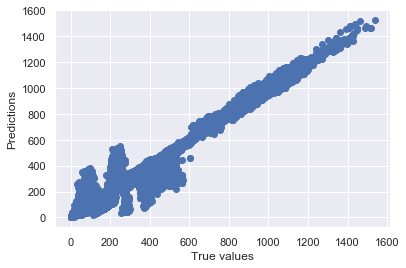

In [59]:
# plot the model
plt.scatter(y_test_P_Z, rd_pred_P_Z_2018)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

#### 2.1.1 Finding important features

In [60]:
# create pandas Series from feature importance
feature_imp_PARK_Z = pd.Series(rand_forest_PARK_Z.feature_importances_, index=feature_list_PARK_Z).sort_values(ascending=False)
feature_imp_PARK_Z

PaidOccupancy                          0.493537
PaidParkingArea_South Lake Union       0.163228
PaidParkingArea_Belltown               0.138999
PaidParkingArea_First Hill             0.078325
HourIn24HourClock                      0.039256
PaidParkingArea_University District    0.022936
PaidParkingArea_Pike-Pine              0.014569
PaidParkingArea_Uptown Triangle        0.009811
PaidParkingArea_Capitol Hill           0.009162
PaidParkingArea_Denny Triangle         0.008071
PaidParkingArea_Commercial Core        0.007893
PaidParkingArea_Chinatown/ID           0.004531
PaidParkingArea_Uptown                 0.002686
PaidParkingArea_Green Lake             0.001996
Weekday_Saturday                       0.001126
PaidParkingArea_Ballard                0.000906
Weekday_Monday                         0.000617
Weekday_Friday                         0.000494
PaidParkingArea_Pioneer Square         0.000397
Weekday_Tuesday                        0.000293
Weekday_Thursday                       0

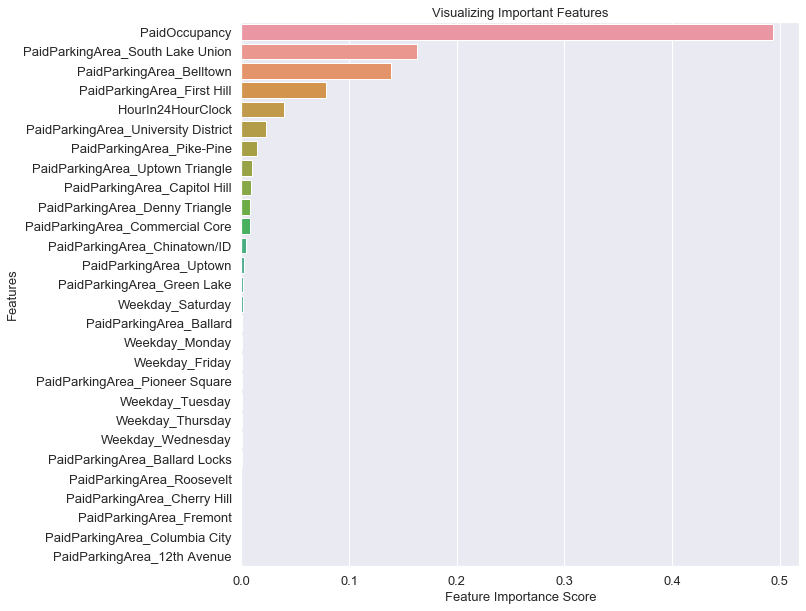

In [73]:
# creating a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp_PARK_Z, y=feature_imp_PARK_Z.index)
plt.xlabel('Feature Importance Score', fontsize=13)
plt.ylabel('Features', fontsize=13)
plt.title('Visualizing Important Features', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

#### 2.1.2 Model's performance

In [62]:
print('Max Error:', metrics.max_error(y_test_P_Z, rd_pred_P_Z_2018))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_P_Z, rd_pred_P_Z_2018))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P_Z, rd_pred_P_Z_2018))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_P_Z, rd_pred_P_Z_2018)))
print('R_squared:', metrics.r2_score(y_test_P_Z, rd_pred_P_Z_2018)) 
print('Explained variance:', metrics.explained_variance_score(y_test_P_Z, rd_pred_P_Z_2018)) 

Max Error: 318.07685264735267
Mean Absolute Error: 5.762403814100895
Mean Squared Error: 326.2841532902619
Root Mean Squared Error: 18.06333726890637
R_squared: 0.9932744571760608
Explained variance: 0.9932744588525776


On average, estimated parking availability is off by 5.76 parking spots. The value of the root mean squared error is 18.06, which is slightly greater than 10% of the mean value of parking availability. This means that our algorithm was not very accurate and cannot make reasonably good predictions.

#### 2.1.3 Predict on data from 2019

In [ ]:
# labels are the values we want to predict
labels_PARK_Z_2019 = np.array(data_PARK_Z_features_2019['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns 
features_PARK_Z_2019 = data_PARK_Z_features_2019.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_PARK_Z_2019 = list(features_PARK_Z_2019.columns) 

# convert to numpy array
features_PARK_Z_2019 = np.array(features_PARK_Z_2019)

In [63]:
# use the forest's predict method on the test data 2019
rd_pred_P_Z_2019 = rand_forest_PARK_Z.predict(features_PARK_Z_2019)

In [65]:
print('Max Error:', metrics.max_error(labels_PARK_Z_2019, rd_pred_P_Z_2019))
print('Mean Absolute Error:', metrics.mean_absolute_error(labels_PARK_Z_2019, rd_pred_P_Z_2019))
print('Mean Squared Error:', metrics.mean_squared_error(labels_PARK_Z_2019, rd_pred_P_Z_2019))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(labels_PARK_Z_2019, rd_pred_P_Z_2019)))
print('R_squared:', metrics.r2_score(labels_PARK_Z_2019, rd_pred_P_Z_2019)) 
print('Explained variance:', metrics.explained_variance_score(labels_PARK_Z_2019, rd_pred_P_Z_2019)) 

Max Error: 459.1204126984127
Mean Absolute Error: 20.410318647599926
Mean Squared Error: 1839.4696480563794
Root Mean Squared Error: 42.88903878680868
R_squared: 0.9677881032533237
Explained variance: 0.9678145067500061


In [68]:
# printing the first 6 values of y_test_P_Z and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(labels_PARK_Z_2019)[i], rd_pred_P_Z_2019[i]))

Actual parking availability: 34 and Predicted parking availability: 33.77708472083473
Actual parking availability: 34 and Predicted parking availability: 33.77708472083473
Actual parking availability: 34 and Predicted parking availability: 33.77708472083473
Actual parking availability: 34 and Predicted parking availability: 33.77708472083473
Actual parking availability: 35 and Predicted parking availability: 36.60707142857144
Actual parking availability: 34 and Predicted parking availability: 34.10024045399046


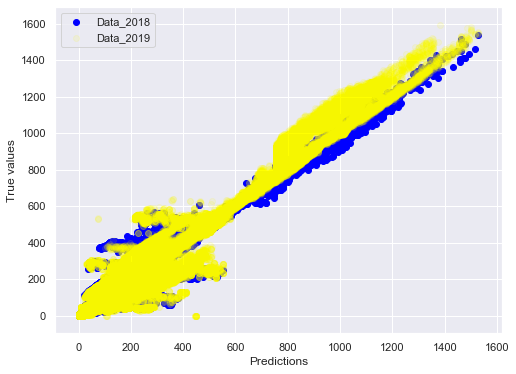

In [66]:
# comparing predictions
plt.figure(figsize=(8,6))
plt.scatter(rd_pred_P_Z_2018, y_test_P_Z, c = 'Blue', label = 'Data_2018')
plt.scatter(rd_pred_P_Z_2019, labels_PARK_Z_2019, c = 'Yellow', label = 'Data_2019', alpha = 0.1)
plt.ylabel('True values')
plt.xlabel('Predictions')
plt.legend()
plt.show()

### 2.2 MODEL WITH ZIP CODES AND PAID OCCUPANCY

In [28]:
# create dataframe with selected columns
data_2018_PARK_less = data_2018_PARK[['PaidParkingArea', 'Weekday', 'HourIn24HourClock', 'ZIP', 'PaidOccupancy', 'AdjustedParkingAvailability']]
data_2019_PARK_less = data_2019_PARK[['PaidParkingArea', 'Weekday', 'HourIn24HourClock', 'ZIP', 'PaidOccupancy', 'AdjustedParkingAvailability']]

In [29]:
# create copy of the dataframe
data_2018_PARK_less_copy = data_2018_PARK_less.copy()
data_2019_PARK_less_copy = data_2019_PARK_less.copy()

In [39]:
# check additional information about dataframe
data_2018_PARK_less_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633422 entries, 0 to 633421
Data columns (total 6 columns):
PaidParkingArea                633422 non-null object
Weekday                        633422 non-null object
HourIn24HourClock              633422 non-null int64
ZIP                            633422 non-null int64
PaidOccupancy                  633422 non-null int64
AdjustedParkingAvailability    633422 non-null int64
dtypes: int64(4), object(2)
memory usage: 29.0+ MB


In [30]:
# change 'ZIP' column to string type
data_2018_PARK_less_copy['ZIP'] = data_2018_PARK_less_copy['ZIP'].apply(str)
data_2019_PARK_less_copy['ZIP'] = data_2019_PARK_less_copy['ZIP'].apply(str)

In [31]:
# dropping rows where Parking area is Westlake Ave N and create new dataframe, since it is not in the data from 2018
data_2019_PARK_copy_less = data_2019_PARK_less_copy[data_2019_PARK_less_copy.PaidParkingArea != 'Westlake Ave N']

In [32]:
# One-hot encode categorical features
data_PARK_features = pd.get_dummies(data_2018_PARK_less_copy)
data_2019_PARK_features = pd.get_dummies(data_2019_PARK_copy_less)

In [43]:
# check column names
data_PARK_features.columns

Index(['HourIn24HourClock', 'PaidOccupancy', 'AdjustedParkingAvailability',
       'PaidParkingArea_12th Avenue', 'PaidParkingArea_Ballard',
       'PaidParkingArea_Ballard Locks', 'PaidParkingArea_Belltown',
       'PaidParkingArea_Capitol Hill', 'PaidParkingArea_Cherry Hill',
       'PaidParkingArea_Chinatown/ID', 'PaidParkingArea_Columbia City',
       'PaidParkingArea_Commercial Core', 'PaidParkingArea_Denny Triangle',
       'PaidParkingArea_First Hill', 'PaidParkingArea_Fremont',
       'PaidParkingArea_Green Lake', 'PaidParkingArea_Pike-Pine',
       'PaidParkingArea_Pioneer Square', 'PaidParkingArea_Roosevelt',
       'PaidParkingArea_South Lake Union',
       'PaidParkingArea_University District', 'PaidParkingArea_Uptown',
       'PaidParkingArea_Uptown Triangle', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday', 'ZIP_98101', 'ZIP_98102', 'ZIP_98103', 'ZIP_98104',
       'ZIP_98105', 'ZIP_98107', '

In [33]:
# labels are the values we want to predict
labels_PARK = np.array(data_PARK_features['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK = data_PARK_features.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names for later use
feature_list_PARK = list(features_PARK.columns) 

# convert to numpy array
features_PARK = np.array(features_PARK)

In [34]:
# split dataset into training set and test set, 70% training and 30% test
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(features_PARK, labels_PARK, test_size=0.3)

In [51]:
print('Training Features Shape:', X_train_P.shape)
print('Training Labels Shape:', y_train_P.shape)
print('Testing Features Shape:', X_test_P.shape)
print('Testing Labels Shape:', y_test_P.shape)

Training Features Shape: (443395, 43)
Training Labels Shape: (443395,)
Testing Features Shape: (190027, 43)
Testing Labels Shape: (190027,)


In [35]:
# instantiate model 
rand_forest_PARK = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_PARK.fit(X_train_P, y_train_P)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
# use the forest's predict method on the test data
rd_pred_P = rand_forest_PARK.predict(X_test_P)

In [54]:
# printing the first 6 values of y_test_P and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_P)[i], rd_pred_P[i]))

Actual parking availability: 265 and Predicted parking availability: 270.2964362026862
Actual parking availability: 7 and Predicted parking availability: 7.0
Actual parking availability: 236 and Predicted parking availability: 257.6864047619047
Actual parking availability: 33 and Predicted parking availability: 35.550497919314715
Actual parking availability: 116 and Predicted parking availability: 114.54098809523812
Actual parking availability: 29 and Predicted parking availability: 29.0


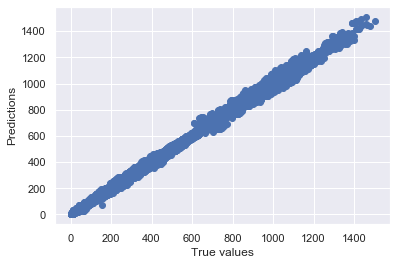

In [55]:
# plot the model
plt.scatter(y_test_P, rd_pred_P)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

If we compare above printed values with this graph it is clear that this model is good, since it predicted correctly 2 times out of 6, and was off twice by 2.

#### 2.2.1 Finding important features

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importance of the variables, how much including a particular variable improves the prediction.

In [56]:
# the feature importances (the higher, the more important the feature)
print(rand_forest_PARK.feature_importances_)

[3.54079048e-02 4.25850024e-01 6.12040613e-04 5.08694544e-04
 6.92207087e-05 6.36761567e-02 4.98626453e-03 7.43186784e-05
 2.16213457e-04 4.70502706e-05 1.00718167e-02 1.05991228e-02
 5.03335649e-02 5.14715155e-05 2.45284105e-04 8.79606701e-03
 1.82480011e-04 1.19912779e-05 1.65055732e-01 9.14048512e-03
 3.52939611e-03 7.68824734e-03 6.65883864e-05 6.06138519e-05
 4.02616987e-04 4.17626836e-05 5.55840157e-05 4.37010090e-05
 1.02907209e-02 8.73169876e-04 3.87321778e-05 9.00491700e-02
 9.40362088e-03 4.03588544e-04 3.34735488e-03 3.75916865e-04
 4.64948244e-05 1.86814224e-03 7.60192148e-02 9.39113110e-03
 6.55301842e-05 1.37373451e-06 1.42521808e-06]


In [57]:
# create pandas Series from feature importance
feature_imp_PARK = pd.Series(rand_forest_PARK.feature_importances_, index=feature_list_PARK).sort_values(ascending=False)
feature_imp_PARK

PaidOccupancy                          0.425850
PaidParkingArea_South Lake Union       0.165056
ZIP_98104                              0.090049
ZIP_98121                              0.076019
PaidParkingArea_Belltown               0.063676
PaidParkingArea_First Hill             0.050334
HourIn24HourClock                      0.035408
PaidParkingArea_Denny Triangle         0.010599
ZIP_98101                              0.010291
PaidParkingArea_Commercial Core        0.010072
ZIP_98105                              0.009404
ZIP_98122                              0.009391
PaidParkingArea_University District    0.009140
PaidParkingArea_Pike-Pine              0.008796
PaidParkingArea_Uptown Triangle        0.007688
PaidParkingArea_Capitol Hill           0.004986
PaidParkingArea_Uptown                 0.003529
ZIP_98109                              0.003347
ZIP_98119                              0.001868
ZIP_98102                              0.000873
PaidParkingArea_12th Avenue            0

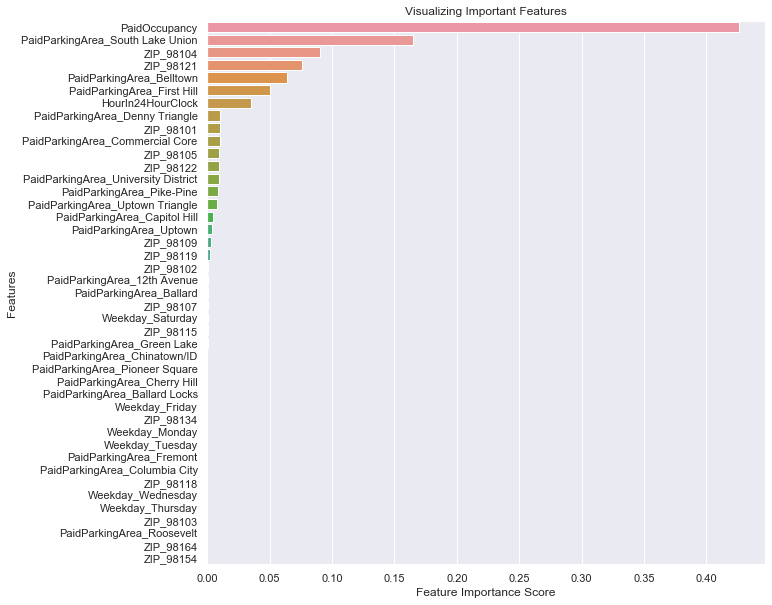

In [58]:
# creating a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp_PARK, y=feature_imp_PARK.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

At the top of the list is PaidOccupancy. This tells us the best predictor of the parking availability for a parking area is paid parking occupancy, a rather intuitive finding. Then follows a mix of different parking areas and zip codes. Hour of the day is a much more important feature than the day of the week. This was expected, since parking availability fluctuates through a day and not all parking areas have the same operating hours.

The top two Zip codes 98104 and 98121 are in the city center.
It is interesting to see that there is a big feature importance difference between the South Lake Union and Zip code 98109, since all of South Lake Union area lies within this zip code.
Another interesting thing is that South Lake Union is more important than Belltown, which is in the city center and mostly in zip code 98121 and a bit in 98101.
First Hill is also in the city center and is part of zip codes 98122, 98101, 98104.
Denny Triangle is also part of the city center.

The least important parking areas are far from the city center. Roosevelt is in zip code 98115, Columbia City in 98118, Fremont is in 98103 and 98107. Looking at the regression model for parking areas, Columbia City and Fremont had the lowest coefficient, which means both have less parking available than in 12th Avenue (omitted group). Roosevelt had a low coefficient as well. When it comes to days, Monday and Saturday had the greatest coefficients (more parking available than on Friday) and Thursday has the lowest coefficient, which we can see is also the least important day of the week in this model.

#### 2.2.2 Model's performance

In [59]:
print('Max Error:', metrics.max_error(y_test_P, rd_pred_P))

Max Error: 99.66445238095241


In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_P, rd_pred_P))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P, rd_pred_P))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_P, rd_pred_P)))

Mean Absolute Error: 2.815455979647122
Mean Squared Error: 40.686418519990646
Root Mean Squared Error: 6.378590637436349


In [61]:
print('R_squared:', metrics.r2_score(y_test_P, rd_pred_P)) 
print('Explained variance:', metrics.explained_variance_score(y_test_P, rd_pred_P)) 

R_squared: 0.9991734532318456
Explained variance: 0.9991734543722733


If we compare max error and mean absolute error of this model to the one with zip codes, then this model did a better job at making predictions. The max prediction error here is 99.66 while at the other one is 166 parking spots. Here the average estimate is off by 2.82 compared to the zip code model where it was 4.46 parking spots. But the zip code model has slightly better (0.0004) explained variance score. Since the root mean squared error is lower than 10% of the mean value for parking availability, we can say that the model is accurate, but it is making visible prediction errors.

#### 2.2.3 Predict on data from 2019

In [37]:
# labels are the values we want to predict
labels_PARK_2019 = np.array(data_2019_PARK_features['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK_2019 = data_2019_PARK_features.drop('AdjustedParkingAvailability', axis = 1) 

# saving feature names
feature_list_PARK_2019 = list(features_PARK_2019.columns) 

# convert to numpy array
features_PARK_2019 = np.array(features_PARK_2019)

In [38]:
# use the forest's predict method on the test data from 2019
rd_pred_P_2019 = rand_forest_PARK.predict(features_PARK_2019)

In [39]:
# printing the first 6 values of labels_PARK_2019 and the predicted results
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(labels_PARK_2019)[i], rd_pred_P_2019[i]))

Actual parking availability: 34 and Predicted parking availability: 34.0956479076479
Actual parking availability: 34 and Predicted parking availability: 34.0956479076479
Actual parking availability: 34 and Predicted parking availability: 34.0956479076479
Actual parking availability: 34 and Predicted parking availability: 34.0956479076479
Actual parking availability: 35 and Predicted parking availability: 35.89115476190476
Actual parking availability: 34 and Predicted parking availability: 34.70512484823398


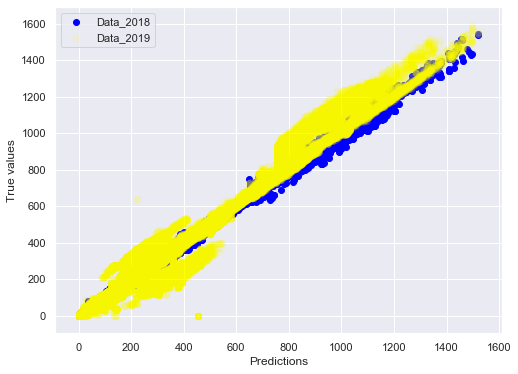

In [42]:
# comparing predictions
plt.figure(figsize=(8,6))
plt.scatter(rd_pred_P, y_test_P, c = 'Blue', label = 'Data_2018')
plt.scatter(rd_pred_P_2019, labels_PARK_2019, c = 'Yellow', label = 'Data_2019', alpha = 0.1)
plt.ylabel('True values')
plt.xlabel('Predictions')
plt.legend()
plt.show()

Looking at the plot above we can notice that the model makes greater prediction errors on the data from 2019. Especially for values smaller than 600, where the yellow plot is more spread out than blue. For instance looking at the yellow dots, it predicted 400 parking spots available, but there were actually 200 parking spots available. But if we look at the blue color, we can see that the range of prediction at 400 is much smaller and accurate. For predictions greater than 600, we can notice that predictions on the data from 2019 are often smaller than the actual value. For example, it predicted 800 parking spots available when in reality there were 1000.

In [41]:
print('Max Error:', metrics.max_error(labels_PARK_2019, rd_pred_P_2019))
print('Mean Absolute Error:', metrics.mean_absolute_error(labels_PARK_2019, rd_pred_P_2019))
print('Explained variance:', metrics.explained_variance_score(labels_PARK_2019, rd_pred_P_2019)) 
print('R_squared:', metrics.r2_score(labels_PARK_2019, rd_pred_P_2019)) 
print('Mean Squared Error:', metrics.mean_squared_error(labels_PARK_2019, rd_pred_P_2019))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(labels_PARK_2019, rd_pred_P_2019)))

Max Error: 453.9457359307359
Mean Absolute Error: 17.7202253092132
Explained variance: 0.9730402406635922
R_squared: 0.9730399864438405
Mean Squared Error: 1539.559344727536
Root Mean Squared Error: 39.237218870958934


Based on these results, it seems like it makes much larger prediction errors on the data from 2019 than from 2018. Which makes sense since it was trained on 2018 data.

Out of curiosity, let's check an example of a decision tree from the 2018 data.

#### 2.2.4 Decision tree

In [43]:
# import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from subprocess import call
from IPython.display import Image

In [44]:
# limit depth of tree to 2 levels
rf_small_PARK_2 = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small_PARK_2.fit(X_train_P, y_train_P)

# extract the small tree
tree_small_PARK_2 = rf_small_PARK_2.estimators_[5]

# save the tree as a png image
export_graphviz(tree_small_PARK_2, out_file = 'small_tree_PARK3.dot', feature_names = feature_list_PARK, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_PARK3.dot')

graph.write_png('small_tree_PARK3.png')

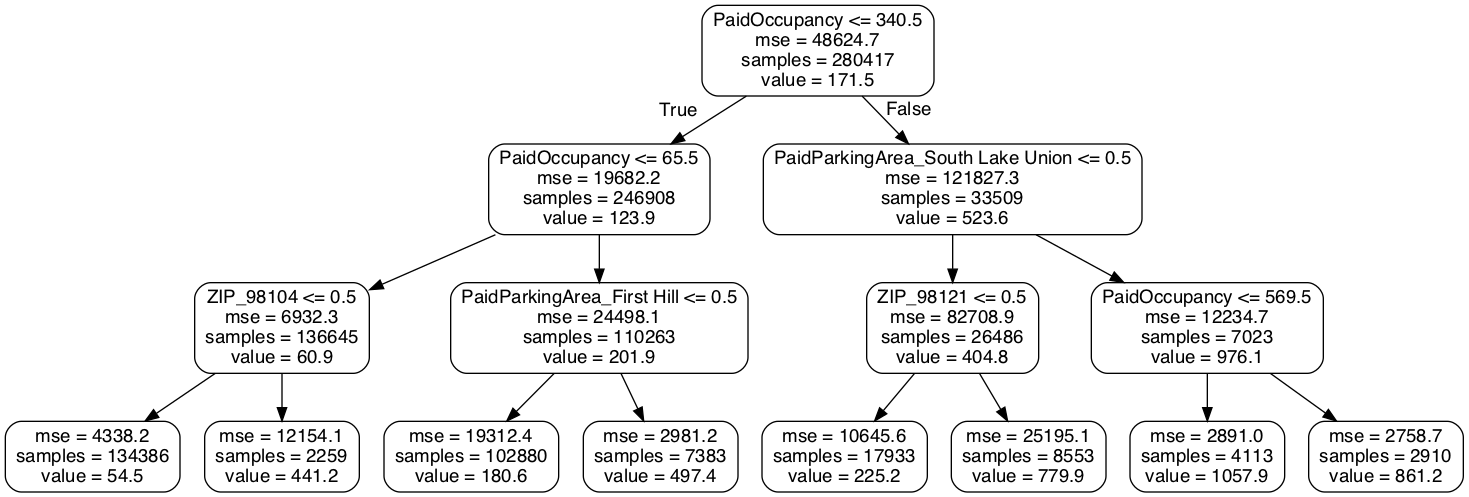

In [45]:
Image('small_tree_PARK3.png')

This decision tree uses PaidOccupancy, South Lake Union parking area, First Hill parking area, Zip code 98104 and Zip code 98121 variables to make predictions. First checking if a data point doesn't have parking occupancy greater than 341 parking spots (a root node). If this is true then it moves down on the left side and checks if this data point has parking occupancy less than 66 parking spots. If it does, then it moves again down on the left side and check if it’s not in ZIP code 98104. Therefore, we conclude that our estimate for the parking availability is 54 parking spots as indicated by the value in the leaf node. An interesting observation in the root node is that there are 280417 samples despite there being 443395 training data points. This is because each tree in the forest is trained on a random subset of the data points with replacement.

###  2.3 MODEL WITH ZIP CODES AND WITHOUT PARKING OCCUPANCY

In [62]:
# labels are the values we want to predict
labels_PARK2 = np.array(data_PARK_features['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK2 = data_PARK_features.drop(['AdjustedParkingAvailability', 'PaidOccupancy'], axis = 1) 

# saving feature names for later use
feature_list_PARK2 = list(features_PARK2.columns) 

# convert to numpy array
features_PARK2 = np.array(features_PARK2)

In [63]:
# split dataset into training set and test set, 70% training and 30% test
X_train_P2, X_test_P2, y_train_P2, y_test_P2 = train_test_split(features_PARK2, labels_PARK2, test_size=0.3)

In [64]:
print('Training Features Shape:', X_train_P2.shape)
print('Training Labels Shape:', y_train_P2.shape)
print('Testing Features Shape:', X_test_P2.shape)
print('Testing Labels Shape:', y_test_P2.shape)

Training Features Shape: (443395, 42)
Training Labels Shape: (443395,)
Testing Features Shape: (190027, 42)
Testing Labels Shape: (190027,)


In [65]:
# instantiate model 
rand_forest_PARK2 = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_PARK2.fit(X_train_P2, y_train_P2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Let’s see what (some of) the predictions are:

In [66]:
# use the forest's predict method on the test data
rd_pred_P2 = rand_forest_PARK2.predict(X_test_P2)

In [67]:
# printing the first 6 values of y_test_P2 and the predict results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_P2)[i], round(rd_pred_P2[i]), 2))

Actual parking availability: 119 and Predicted parking availability: 117.0
Actual parking availability: 105 and Predicted parking availability: 116.0
Actual parking availability: 39 and Predicted parking availability: 30.0
Actual parking availability: 142 and Predicted parking availability: 171.0
Actual parking availability: 77 and Predicted parking availability: 76.0
Actual parking availability: 13 and Predicted parking availability: 10.0


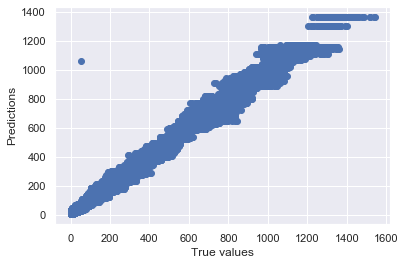

In [68]:
# plot the model
plt.scatter(y_test_P2, rd_pred_P2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

If we compare this graph with the previous one, we can see that this graph is wider, which means greater prediction errors. What the above printed out values confirm. This model does not have as good a performance as the previous one with parking occupancy included. Seems like paid parking occupancy is the most important feature of them all. On this graph we can see one potential outlier, where the true value is around 50, but the model predicted around 1050 parking spots.

#### 2.3.1 Finding feature importance

In [69]:
# the feature importances (the higher, the more important the feature)
print(rand_forest_PARK2.feature_importances_)

[4.91254633e-02 8.02817032e-05 9.93297968e-03 3.59825356e-05
 6.56268499e-02 7.07264933e-03 8.87358013e-07 1.61993831e-04
 1.73184694e-05 2.20141303e-02 8.60881222e-02 5.66257515e-02
 1.27127786e-05 1.59436759e-05 4.47725486e-02 3.82323993e-04
 1.00004571e-04 1.29561381e-01 3.09451471e-02 1.09892523e-02
 2.12284230e-04 4.70659194e-04 1.35897977e-03 4.98373559e-03
 1.54431538e-04 2.88821179e-04 1.58595625e-04 1.03267233e-02
 1.31203409e-01 1.25068328e-05 7.61722665e-02 3.08760645e-02
 4.43162564e-05 1.09293933e-01 7.77393585e-06 2.09994714e-05
 3.02370368e-03 1.16593865e-01 1.19349184e-03 3.88977636e-05
 1.41033837e-06 1.40756934e-06]


In [70]:
# create pandas Searies from feature importance
feature_imp_PARK2 = pd.Series(rand_forest_PARK2.feature_importances_, index=feature_list_PARK2).sort_values(ascending=False)
feature_imp_PARK2

ZIP_98102                              1.312034e-01
PaidParkingArea_South Lake Union       1.295614e-01
ZIP_98121                              1.165939e-01
ZIP_98109                              1.092939e-01
PaidParkingArea_Denny Triangle         8.608812e-02
ZIP_98104                              7.617227e-02
PaidParkingArea_Belltown               6.562685e-02
PaidParkingArea_First Hill             5.662575e-02
HourIn24HourClock                      4.912546e-02
PaidParkingArea_Pike-Pine              4.477255e-02
PaidParkingArea_University District    3.094515e-02
ZIP_98105                              3.087606e-02
PaidParkingArea_Commercial Core        2.201413e-02
PaidParkingArea_Uptown                 1.098925e-02
ZIP_98101                              1.032672e-02
PaidParkingArea_Ballard                9.932980e-03
PaidParkingArea_Capitol Hill           7.072649e-03
Weekday_Saturday                       4.983736e-03
ZIP_98119                              3.023704e-03
Weekday_Mond

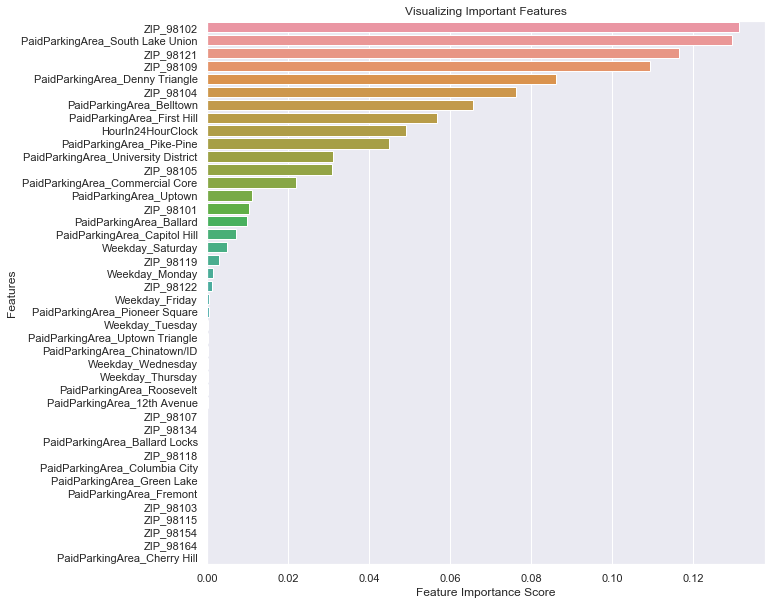

In [71]:
# creating a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp_PARK2, y=feature_imp_PARK2.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


This graph turned out in a similar way than the one with zip codes, and parking occupancy. Once we remove paid parking occupancy, the importance of features has changed. Here the most important feature is zip code 98102, but in the previous model (with parking occupancy), this feature was somewhere in the middle of the feature importance scale.


#### 2.3.2 Model's performance

In [72]:
print('Max Error:', metrics.max_error(y_test_P2, rd_pred_P2))

Max Error: 1007.1638075025758


In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_P2, rd_pred_P2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P2, rd_pred_P2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_P2, rd_pred_P2)))

Mean Absolute Error: 10.333675856741287
Mean Squared Error: 316.23577054933196
Root Mean Squared Error: 17.78301916293552


In [74]:
print('R_squared:', metrics.r2_score(y_test_P2, rd_pred_P2)) 
print('Explained variance:', metrics.explained_variance_score(y_test_P2, rd_pred_P2)) 

R_squared: 0.9934923402440081
Explained variance: 0.9934925574748237


We can see that without PaidParkingOccupancy the model is not that good at predictions, its maximum prediction error and average error are visibly greater. And the value of root mean squared error is slightly greater than 10% of the mean value of parking availability (171.69). This means that our model was not very accurate.

Out of curiosity, let's check an example of a decision tree from this data.

#### 2.3.3 Decision tree

In [104]:
# import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from subprocess import call
from IPython.display import Image

In [106]:
# limit depth of tree to 2 levels
rf_small_PARK = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small_PARK.fit(X_train_P2, y_train_P2)

# extract the small tree
tree_small_PARK = rf_small_PARK.estimators_[5]

# save the tree as a png image
export_graphviz(tree_small_PARK, out_file = 'small_tree_PARK2.dot', feature_names = feature_list_PARK2, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_PARK2.dot')

graph.write_png('small_tree_PARK2.png')

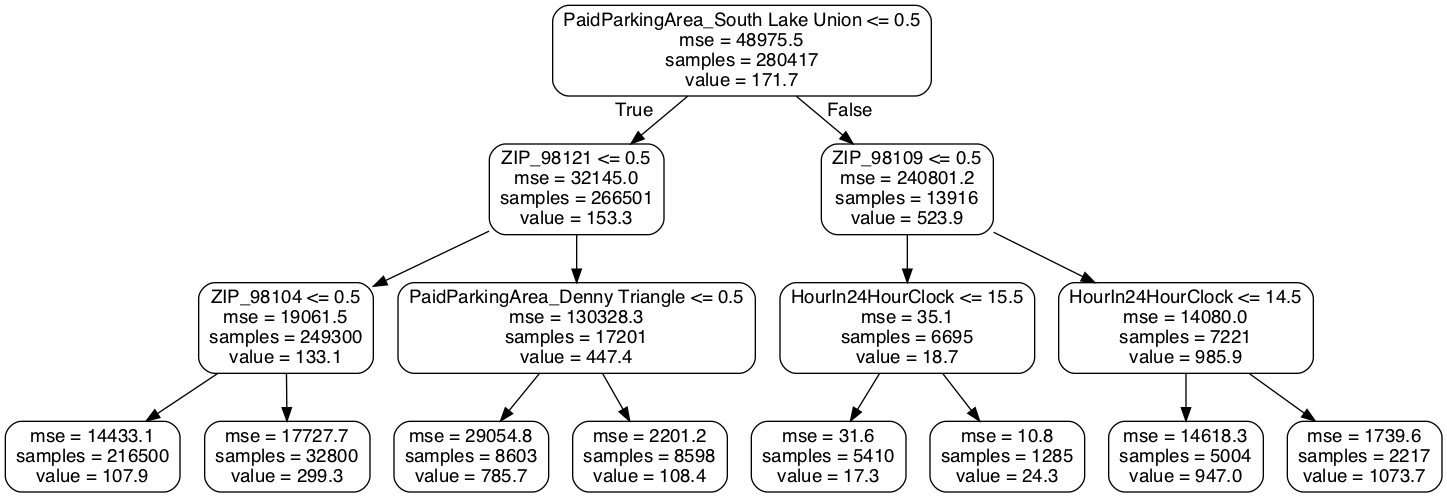

In [107]:
Image('small_tree_PARK2.png')

This decision tree is making predictions for data points by first checking if a data point is not in the South Lake Union parking area (a root node). If this is true then it moves down on the left side and check if this data point is in ZIP code 98121. If it is not true it then moves down again on the left side and checks if its not in ZIP code 98104. Therefore, we conclude that our estimate for the parking availability is 107 parking spots as indicated by the value in the leaf node.
An interesting observation in the root node is that there are 280417 samples despite there being 443395 training data points. This is because each tree in the forest is trained on a random subset of the data points with replacement.


### 2.4 MODEL FOR SELECTED PARKING AREA 

Based on the feature importance in both parking area models, we chose South Lake Union.

In [83]:
# create a dataframe for South Lake Union parking area
df_PARK_SLU = data_2018_PARK_less_copy[data_2018_PARK_less_copy['PaidParkingArea'] == 'South Lake Union']

In [92]:
df_PARK_SLU.describe()

,HourIn24HourClock,PaidOccupancy,AdjustedParkingAvailability
count,31201.000000,31201.000000,31201.000000
mean,12.500176,281.527900,519.355341
std,2.872450,275.944189,489.280012
min,8.000000,0.000000,5.000000
25%,10.000000,12.000000,19.000000
50%,13.000000,347.000000,792.000000
75%,15.000000,524.000000,1009.000000
max,18.000000,784.000000,1399.000000


In [84]:
# One-hot encode categorical features
data_PARK_SLU_dum = pd.get_dummies(df_PARK_SLU)

In [87]:
# check column names
data_PARK_SLU_dum.columns

Index(['HourIn24HourClock', 'PaidOccupancy', 'AdjustedParkingAvailability',
       'PaidParkingArea_South Lake Union', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday', 'ZIP_98102', 'ZIP_98109'],
      dtype='object')

### 2.4.1 Model with parking occupancy

In [128]:
# labels are the values we want to predict
labels_PARK_SLU2 = np.array(data_PARK_SLU_dum['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK_SLU2 = data_PARK_SLU_dum.drop(['PaidParkingArea_South Lake Union', 'AdjustedParkingAvailability'], axis = 1) 

# saving feature names for later use
feature_list_PARK_SLU2 = list(features_PARK_SLU2.columns) 

# convert to numpy array
features_PARK_SLU2 = np.array(features_PARK_SLU2)

In [129]:
# split dataset into training set and test set, 70% training and 30% test
X_train_SLU2, X_test_SLU2, y_train_SLU2, y_test_SLU2 = train_test_split(features_PARK_SLU2, labels_PARK_SLU2, test_size=0.3)

In [130]:
print('Training Features Shape:', X_train_SLU2.shape)
print('Training Labels Shape:', y_train_SLU2.shape)
print('Testing Features Shape:', X_test_SLU2.shape)
print('Testing Labels Shape:', y_test_SLU2.shape)

Training Features Shape: (21840, 10)
Training Labels Shape: (21840,)
Testing Features Shape: (9361, 10)
Testing Labels Shape: (9361,)


In [131]:
# instantiate model 
rand_forest_SLU2 = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_SLU2.fit(X_train_SLU2, y_train_SLU2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [132]:
# calculate predictions
rand_forest_SLU2_pred = rand_forest_SLU2.predict(X_test_SLU2)

In [134]:
# printing the first 6 values of y_test_SLU2 and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_SLU2)[i], round(rand_forest_SLU2_pred[i]), 2))

Actual parking availability: 1074 and Predicted parking availability: 1026.0
Actual parking availability: 851 and Predicted parking availability: 839.0
Actual parking availability: 1036 and Predicted parking availability: 1098.0
Actual parking availability: 27 and Predicted parking availability: 26.0
Actual parking availability: 12 and Predicted parking availability: 12.0
Actual parking availability: 1068 and Predicted parking availability: 1056.0


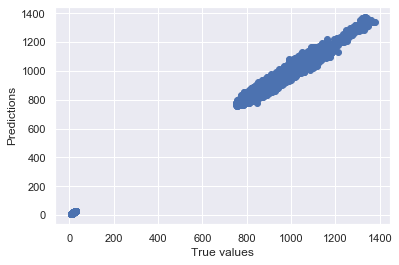

In [135]:
# plot the model
plt.scatter(y_test_SLU2, rand_forest_SLU2_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

By looking at the plot and printed values we can see that predicted values are close to the true values. Out of 6 printed values, only one was correctly predicted. In this graph we can notice that it is much better at predicting small values (where true values are less than 100 parking spots), since it is narrower.

#### 2.4.1.1 Finding feature importance

In [136]:
# check important features
feature_imp_SLU2 = pd.Series(rand_forest_SLU2.feature_importances_, index=feature_list_PARK_SLU2).sort_values(ascending=False)
feature_imp_SLU2

PaidOccupancy        0.756720
ZIP_98102            0.135838
ZIP_98109            0.106730
HourIn24HourClock    0.000337
Weekday_Monday       0.000108
Weekday_Tuesday      0.000061
Weekday_Friday       0.000056
Weekday_Wednesday    0.000055
Weekday_Saturday     0.000054
Weekday_Thursday     0.000041
dtype: float64

As expected, paid parking occupancy is the most important feature, followed by two zip codes to which this parking area belongs to. Days of the week are the least important features.

#### 2.4.1.2 Model's performance

In [137]:
print('Max Error:', metrics.max_error(y_test_SLU2, rand_forest_SLU2_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_SLU2, rand_forest_SLU2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_SLU2, rand_forest_SLU2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_SLU2, rand_forest_SLU2_pred)))
print('R_squared:', metrics.r2_score(y_test_SLU2, rand_forest_SLU2_pred)) 
print('Explained variance:', metrics.explained_variance_score(y_test_SLU2, rand_forest_SLU2_pred)) 

Max Error: 92.30196825396797
Mean Absolute Error: 8.939481920715957
Mean Squared Error: 286.39418447580687
Root Mean Squared Error: 16.92318482070697
R_squared: 0.998807499097095
Explained variance: 0.9988075083046076


This model has lower maximum prediction error compared to the model with all parking areas, but has a greater average prediction error, which is unexpected, since this model is just about a specific parking area. It also has a lower variance score.

#### 2.4.1.3 Decision tree

In [157]:
# limit depth of tree to 2 levels
rf_small2 = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small2.fit(X_train_SLU2, y_train_SLU2)

# extract the small tree
tree_small2 = rf_small2.estimators_[5]

# save the tree as a png image
export_graphviz(tree_small2, out_file = 'small_tree_south_lake_union_V3.dot', feature_names = feature_list_PARK_SLU2, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_south_lake_union_V3.dot')

graph.write_png('small_tree_south_lake_union_V3.png')

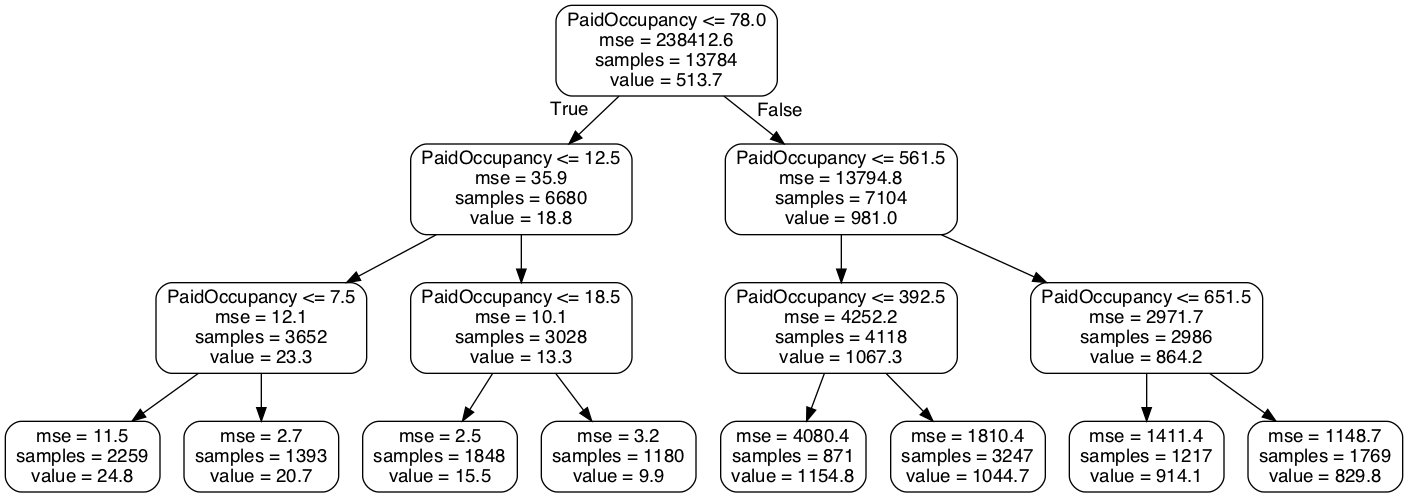

In [158]:
Image('small_tree_south_lake_union_V3.png')

This decision tree uses only PaidOccupancy as a variable to make predictions. In the root node it checks if a data point has paid parking occupancy less than 79. In case that is false, it moves down on the right side. Where the second question is if the paid parking occupancy is less than 562. If the answer is false is moves down on the right side to the final question if the paid parking occupancy is less than 652. If it is false, then our estimate parking availability is 829 parking spots.

### 2.4.2 Model without parking occupancy

In [85]:
# labels are the values we want to predict
labels_PARK_SLU = np.array(data_PARK_SLU_dum['AdjustedParkingAvailability']) 

# remove the labels from the features
# axis 1 refers to the columns
features_PARK_SLU = data_PARK_SLU_dum.drop(['PaidParkingArea_South Lake Union', 'AdjustedParkingAvailability', 'PaidOccupancy'], axis = 1) 

# saving feature names for later use
feature_list_PARK_SLU = list(features_PARK_SLU.columns) 

# convert to numpy array
features_PARK_SLU = np.array(features_PARK_SLU)

In [86]:
# split dataset into training set and test set, 70% training and 30% test
X_train_SLU, X_test_SLU, y_train_SLU, y_test_SLU = train_test_split(features_PARK_SLU, labels_PARK_SLU, test_size=0.3)

In [119]:
print('Training Features Shape:', X_train_SLU.shape)
print('Training Labels Shape:', y_train_SLU.shape)
print('Testing Features Shape:', X_test_SLU.shape)
print('Testing Labels Shape:', y_test_SLU.shape)

Training Features Shape: (21840, 9)
Training Labels Shape: (21840,)
Testing Features Shape: (9361, 9)
Testing Labels Shape: (9361,)


In [87]:
# instantiate model 
rand_forest_SLU = RandomForestRegressor(n_estimators = 100)

# train the model on training data
rand_forest_SLU.fit(X_train_SLU, y_train_SLU)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
# use the forest's predict method on the test data
rf_pred_SLU = rand_forest_SLU.predict(X_test_SLU)

In [122]:
# printing the first 6 values of y_test_SLU and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_SLU)[i], round(rf_pred_SLU[i]), 2))

Actual parking availability: 10 and Predicted parking availability: 15.0
Actual parking availability: 12 and Predicted parking availability: 14.0
Actual parking availability: 991 and Predicted parking availability: 985.0
Actual parking availability: 1025 and Predicted parking availability: 1034.0
Actual parking availability: 17 and Predicted parking availability: 16.0
Actual parking availability: 20 and Predicted parking availability: 20.0


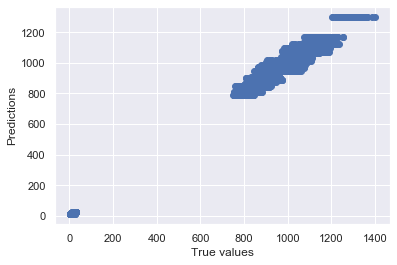

In [123]:
# plot the model
plt.scatter(y_test_SLU, rf_pred_SLU)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

Looking at the graph and printed values, this model is not good at predicting parking spots correctly, but prediction errors are not that big. We can also see that there are some gaps in the graph, for example there are no true values between 50 and 700. Another gap in the model is between 1200 and 1300. 

#### 2.4.2.1 Finding feature importance

In [88]:
feature_imp_SLU = pd.Series(rand_forest_SLU.feature_importances_, index=feature_list_PARK_SLU).sort_values(ascending=False)
feature_imp_SLU

ZIP_98109            0.495912
ZIP_98102            0.476437
HourIn24HourClock    0.021899
Weekday_Saturday     0.004723
Weekday_Monday       0.000856
Weekday_Friday       0.000096
Weekday_Tuesday      0.000034
Weekday_Thursday     0.000024
Weekday_Wednesday    0.000019
dtype: float64

It is interesting to see that often zip codes are a more important feature than the hour of the day.

#### 2.4.2.2 Model's performance

In [125]:
print('Max Error:', metrics.max_error(y_test_SLU, rf_pred_SLU))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_SLU, rf_pred_SLU))

Max Error: 117.84498861737802
Mean Absolute Error: 16.11024860901074


In [91]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_SLU, rf_pred_SLU))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_SLU, rf_pred_SLU)))

Mean Squared Error: 683.8462562348566
Root Mean Squared Error: 26.15045422616702


In [126]:
print('R_squared:', metrics.r2_score(y_test_SLU, rf_pred_SLU)) 
print('Explained variance:', metrics.explained_variance_score(y_test_SLU, rf_pred_SLU)) 

R_squared: 0.997118129550812
Explained variance: 0.9971191253896012


Since this model is focused on just one parking area, we expected better performance from the model. It has a maximum prediction error of 117.85, and the average estimate is off by 16.11 parking spots. Compared to the previous model (with included parking occupancy), it has higher prediction errors and lower variance score.

#### 2.4.2.3 Decision tree

In [159]:
# limit depth of tree to 2 levels
rf_small_SLU = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small_SLU.fit(X_train_SLU, y_train_SLU)

# extract the small tree
tree_small_SLU = rf_small_SLU.estimators_[5]

# save the tree as a png image
export_graphviz(tree_small_SLU, out_file = 'small_tree_south_lake_union3.dot', feature_names = feature_list_PARK_SLU, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_south_lake_union3.dot')

graph.write_png('small_tree_south_lake_union3.png')

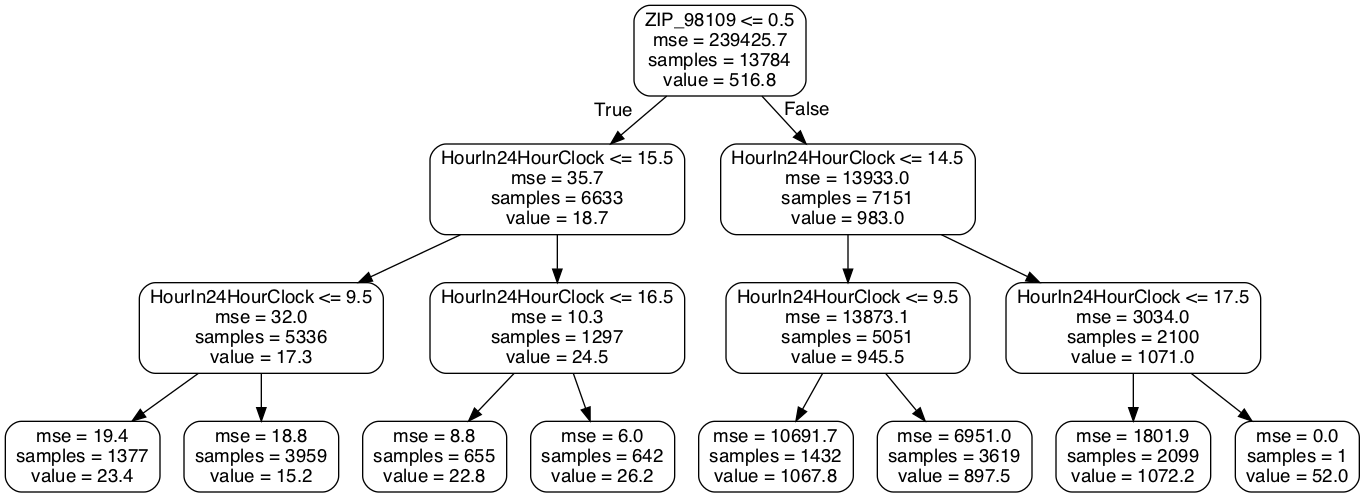

In [160]:
Image('small_tree_south_lake_union3.png')

In the root node this decision tree checks if a data point is not in ZIP code 98109. And if it is not then it moves down on the left. The second question is whether the hour of a day is less than 16 (4pm). If it is true then it moves again down on the left to the final question, which is if the hour of the day is less than 10 (10am). If that is true than the estimated value for parking availability is 23 and if is is not true then parking availability is 15 parking spots. What we can notice is that in the tree there are only 2 variables (zip code 98109 and the hour of the day) were actually used to make predictions. According to this particular decision tree, the rest of the features are not important for making predictions.

Now let's use this model (South Lake Union without parking occupancy) and select only data when the day of the week was Wednesday, to see if true and predicted values match.

#### 2.4.2.4 Visualization of true and predicted values when the day was Wednesday

In [138]:
# select wednesday from training values
wednesday = features_PARK_SLU[:, feature_list_PARK_SLU.index('Weekday_Wednesday')]
hour = features_PARK_SLU[:, feature_list_PARK_SLU.index('HourIn24HourClock')]

# dataframe with true values and dates
true_data_SLU_wed = pd.DataFrame(data = {'Wednesday': wednesday, 'Hour': hour, 'ParkingAvailability': labels_PARK_SLU})

In [143]:
# select wednesday from predictions
wednesday_pred = X_test_SLU[:, feature_list_PARK_SLU.index('Weekday_Wednesday')]
hour_pred = X_test_SLU[:, feature_list_PARK_SLU.index('HourIn24HourClock')]
# dataframe with predictions and hour
predictions_data = pd.DataFrame(data = {'Wednesday': wednesday_pred, 'Hour': hour_pred, 'Prediction': rf_pred_SLU})

In [140]:
# select rows for wednesdays
data_SLU_wednesday = true_data_SLU_wed[true_data_SLU_wed['Wednesday'] > 0]

In [149]:
# select rows for wednesdays from predictions
data_SLU_wednesday_pred = predictions_data[predictions_data['Wednesday'] > 0]

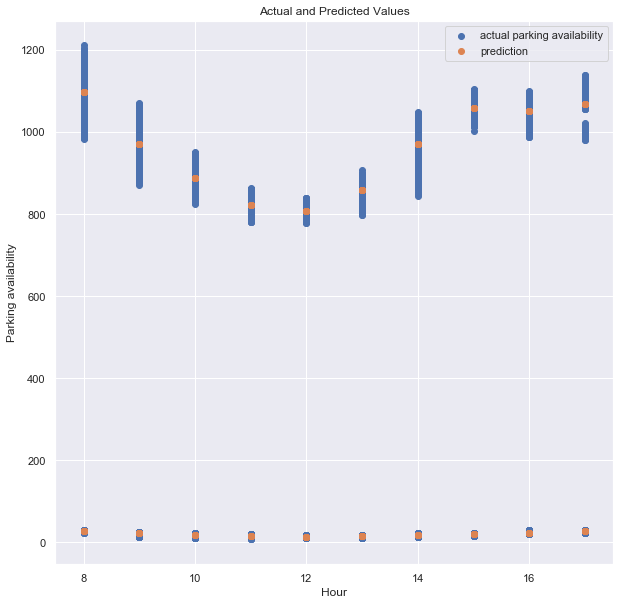

In [155]:
# plot the actual values and predicted values
plt.figure(figsize=(10,10))
plt.scatter(data_SLU_wednesday['Hour'], data_SLU_wednesday['ParkingAvailability'], label = 'actual parking availability')# Plot the predicted values
plt.scatter(data_SLU_wednesday_pred['Hour'], data_SLU_wednesday_pred['Prediction'], label = 'prediction')
#plt.xticks(rotation = '60') 
plt.legend()# Graph labels
plt.xlabel('Hour') 
plt.ylabel('Parking availability') 
plt.title('Actual and Predicted Values')
plt.show()

From the plot above, we can see that all predicted values for each hour of Wednesday are in range of true values.

What would be interesting to see is what would happen if we had an optimized model. As an example, in the next chapter we will use a Parking area with parking occupancy model as a base and build an optimized model for comparison.

## 3 RANDOM HYPERPARAMETER GRID

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### 3.1 Random Search Training

Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [169]:
# use the random grid to search for best hyperparameters
# first create the base model to tune
RF = RandomForestRegressor()

# random search of parameters, using 3 fold cross validation, 
# search across 5 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
RF_random.fit(X_train_P, y_train_P)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 30.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


The best parameters from fitting the random search:

In [170]:
RF_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

From these results, we should be able to narrow the range of values for each hyperparameter.

### 3.1.1 Evaluate Random Search

To determine if random search yielded a better model, we compare the base model (parking areas with parking occupancy) with the best random search model.

#### 3.1.1.1 Building a model from best parameters

In [171]:
# instantiate model 
rand_forest_PARK3 = RandomForestRegressor(n_estimators = 20, min_samples_split = 10, min_samples_leaf = 2, max_features= 'sqrt', max_depth  = 50, bootstrap = True)

# train the model on training data
rand_forest_PARK3.fit(X_train_P, y_train_P)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [172]:
# use the forest's predict method on the test data
rd_pred_P3 = rand_forest_PARK3.predict(X_test_P)

In [173]:
# printing the first 5 values of y_test_P and the predict results target
for i in range(0, 5):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_P)[i], round(rd_pred_P3[i]), 2))

Actual parking availability: 265 and Predicted parking availability: 271.0
Actual parking availability: 7 and Predicted parking availability: 7.0
Actual parking availability: 236 and Predicted parking availability: 252.0
Actual parking availability: 33 and Predicted parking availability: 36.0
Actual parking availability: 116 and Predicted parking availability: 114.0


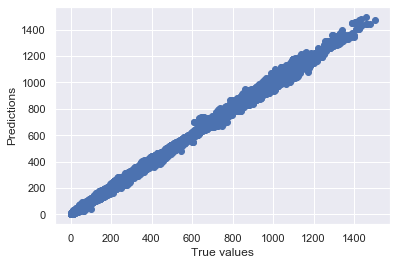

In [174]:
# plot the model
plt.scatter(y_test_P, rd_pred_P3)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

From the printed values and this plot we can see that this model is good at prediction. There are prediction errors, but they are not large, since the spread is not very wide.

#### 3.1.1.1.1 Model's performance

In [176]:
print('Max Error:', metrics.max_error(y_test_P, rd_pred_P3))

Max Error: 97.01667429792417


In [175]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_P, rd_pred_P3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P, rd_pred_P3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_P, rd_pred_P3)))
print('R_squared:', metrics.r2_score(y_test_P, rd_pred_P3)) 
print('Explained variance:', metrics.explained_variance_score(y_test_P, rd_pred_P3)) 

Mean Absolute Error: 2.8783743887844437
Mean Squared Error: 37.49539353998763
Root Mean Squared Error: 6.123348229521789
R_squared: 0.9992382790749713
Explained variance: 0.9992382957013517


This model has slightly better performance compare to the parking area with parking occupancy. It has lower maximum error and mean squared error. 

## 3.2 Grid Search with Cross Validation with parking area data

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to focus our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [179]:
from sklearn.model_selection import GridSearchCV

In [185]:
# create the parameter grid based on the results of random search 
param_grid_t = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 80],
    'n_estimators': [30, 50, 60, 100]
}

In [186]:
# create a based model
RF2 = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF2, param_grid = param_grid_t, cv = 3, n_jobs = -1, verbose = 2)

In [187]:
# fit the grid search to the data
grid_search.fit(X_train_P, y_train_P)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 47.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [188]:
# check the best parameters for the model
grid_search.best_params_

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 100}

In [189]:
# check the best estimator for the model
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [190]:
# getting prediction values
grid_predictions = best_grid.predict(X_test_P)

In [191]:
# printing the first 6 values of y_test_P and the predicted results target
for i in range(0, 6):
    print('Actual parking availability: {} and Predicted parking availability: {}'.format(list(y_test_P)[i], round(grid_predictions[i]), 2))

Actual parking availability: 265 and Predicted parking availability: 270.0
Actual parking availability: 7 and Predicted parking availability: 7.0
Actual parking availability: 236 and Predicted parking availability: 258.0
Actual parking availability: 33 and Predicted parking availability: 35.0
Actual parking availability: 116 and Predicted parking availability: 114.0
Actual parking availability: 29 and Predicted parking availability: 29.0


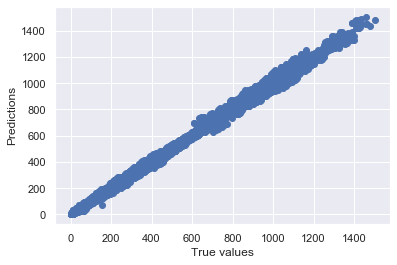

In [192]:
# plot the model
plt.scatter(y_test_P, grid_predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

From the plot and printed values we can say that when values (parking spots availability) aren't predicted correctly, they are close (the errors are small).

Let's take a closer look at prediction errors.

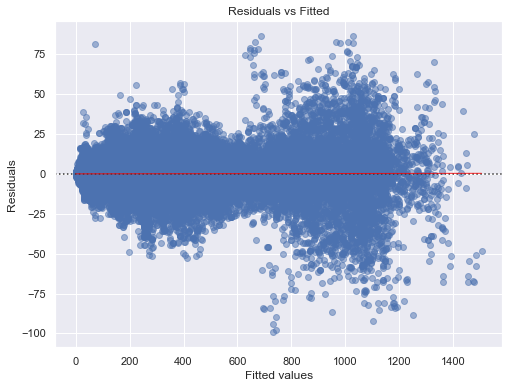

In [195]:
# create residual plot
plt.figure(figsize=(8,6))
_ = sns.residplot(grid_predictions, y_test_P, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
_ = plt.title('Residuals vs Fitted')
_ = plt.xlabel('Fitted values')
_ = plt.ylabel('Residuals')
plt.show()

By looking at the plot we can see that most prediction errors are between -75 and 75 and they have almost the same spread on both sides (negative and positive). And the model makes bigger errors at predicting true values that are greater than 600.

In [212]:
# calculate prediction errors
grid_residuals = y_test_P - grid_predictions

In [214]:
import scipy.stats as stats

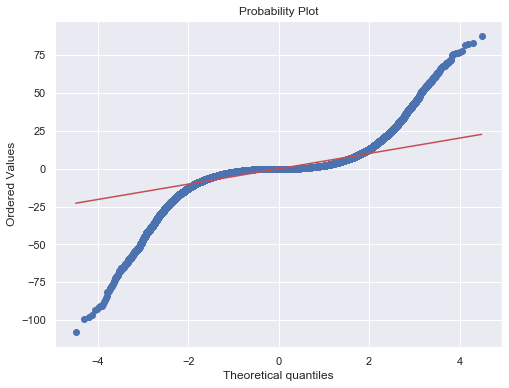

In [215]:
# construct a quantile plot of the residuals
fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = stats.probplot(grid_residuals, plot=ax, fit=True)
plt.show()

From the plot above, we can say that prediction errors aren't normally distributed.

#### 3.2.1 Model's performance

In [223]:
print('Max Error:', metrics.max_error(y_test_P, grid_predictions))

Max Error: 108.19111111111124


In [186]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_P, grid_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_P, grid_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_P, grid_predictions)))
print('R_squared:', metrics.r2_score(y_test_P, grid_predictions)) 
print('Explained variance:', metrics.explained_variance_score(y_test_P, grid_predictions)) 

Mean Absolute Error: 2.789289073612447
Mean Squared Error: 40.10487762024762
Root Mean Squared Error: 6.332841196512638
R_squared: 0.9991796369374812
Explained variance: 0.9991796396332092


By comparing this model to the parking area with parking occupancy model, we can see that they have a similar performance. The biggest difference is the maximum predicted error, which in this model is greater for 9 parking spots.